# Understanding Logistic Regression with Scikit-Learn

Logistic Regression is a fundamental supervised machine learning algorithm used primarily for **binary classification** problems (where the target variable has two possible outcomes, e.g., Yes/No, True/False, 0/1). Despite its name containing "Regression", it's a classification algorithm.

It models the probability that a given input point belongs to a particular class. It's based on the **logistic function**, also known as the **sigmoid function**.

### How Logistic Regression Works

1.  **Linear Combination:** Like Linear Regression, Logistic Regression starts by calculating a weighted sum of the input features, plus a bias term (intercept). This is often represented as 'z':
    \[ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n = \mathbf{w}^T \mathbf{x} + b \]
    Where \(\mathbf{w}\) is the vector of weights (coefficients \(\beta_1, \dots, \beta_n\)), \(\mathbf{x}\) is the vector of input features, and \(b\) is the bias term (\(\beta_0\)).

2.  **Sigmoid Function:** Instead of using 'z' directly as the output (like in Linear Regression), Logistic Regression passes 'z' through the sigmoid function, \(\sigma(z)\). The sigmoid function squashes any real-valued number into the range (0, 1).
    \[ \sigma(z) = \frac{1}{1 + e^{-z}} \]
    The output of the sigmoid function, \(\sigma(z)\), is interpreted as the **probability** of the positive class (usually denoted as class 1). Let's call this probability \( P(y=1 | \mathbf{x}) \).

3.  **Decision Boundary:** To make a class prediction, a threshold is applied to the predicted probability. The most common threshold is 0.5:
    *   If \( P(y=1 | \mathbf{x}) \ge 0.5 \), predict class 1.
    *   If \( P(y=1 | \mathbf{x}) < 0.5 \), predict class 0.
    The equation \( P(y=1 | \mathbf{x}) = 0.5 \) corresponds to \( z = 0 \) (since \(\sigma(0) = 0.5\)). Therefore, the decision boundary is defined by the linear equation \( \mathbf{w}^T \mathbf{x} + b = 0 \), which is a hyperplane (a line in 2D, a plane in 3D, etc.). This means standard Logistic Regression creates a **linear decision boundary**.

### Sigmoid Function Visualization

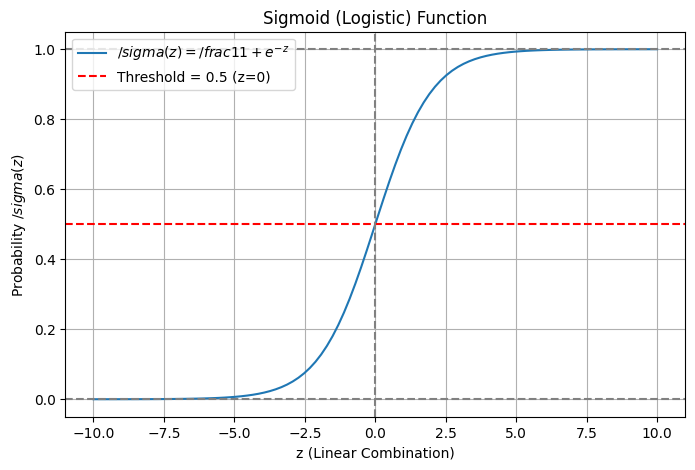

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, sigma_z, label='$/sigma(z) = /frac{1}{1 + e^{-z}}$')
plt.title('Sigmoid (Logistic) Function')
plt.xlabel('z (Linear Combination)')
plt.ylabel('Probability $/sigma(z)$')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5 (z=0)')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend()
plt.show()

### Cost Function: Log Loss

Logistic Regression uses a cost function called **Log Loss** (or Binary Cross-Entropy) to find the optimal weights (\(\beta\) values). This function penalizes confident wrong predictions more heavily than less confident ones. Minimizing this cost function leads to the best model parameters.

*\[ J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)}))] \]*

Where \(m\) is the number of training examples, \(y^{(i)}\) is the true label of the i-th example, and \(\sigma(z^{(i)})\) is the predicted probability for the i-th example.

### Regularization

To prevent overfitting, especially when dealing with many features or multicollinearity, Logistic Regression often incorporates regularization. The most common types are:

*   **L2 Regularization (Ridge):** Adds a penalty proportional to the *square* of the magnitude of the coefficients to the cost function. This shrinks coefficients towards zero but rarely makes them exactly zero. It's the default in scikit-learn's `LogisticRegression`.
*   **L1 Regularization (Lasso):** Adds a penalty proportional to the *absolute value* of the magnitude of the coefficients. This can shrink some coefficients to exactly zero, effectively performing feature selection.

In scikit-learn's `LogisticRegression`:
*   `penalty`: Specifies the norm used in the penalization ('l1', 'l2', 'elasticnet', 'none').
*   `C`: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization (larger penalty), while larger values specify weaker regularization (smaller penalty). This is the *opposite* of the alpha parameter in Ridge/Lasso regression models.

### Assumptions of Logistic Regression

1.  **Binary Outcome:** The dependent variable must be binary (or ordinal, though standard logistic regression is for binary).
2.  **Independence of Observations:** Observations should be independent of each other.
3.  **No Multicollinearity:** Independent variables should not be too highly correlated with each other.
4.  **Linearity of Independent Variables and Log-Odds:** The independent variables are linearly related to the log-odds of the outcome. \( \log(\frac{P(y=1)}{1-P(y=1)}) = z = \beta_0 + \beta_1 x_1 + \dots \)
5.  **Large Sample Size:** Generally requires a reasonably large sample size for reliable results.

### Pros and Cons of Logistic Regression

**Pros:**
*   **Interpretable:** Coefficients can be interpreted in terms of log-odds, providing insights into the influence of each feature.
*   **Outputs Probabilities:** Provides well-calibrated probabilities for class membership.
*   **Efficient:** Computationally inexpensive to train and predict.
*   **Baseline Model:** Often used as a strong baseline for binary classification tasks.
*   **Regularization:** Easily incorporates regularization to prevent overfitting.

**Cons:**
*   **Assumes Linearity:** Assumes a linear relationship between features and the log-odds of the outcome. May not perform well if the decision boundary is highly non-linear.
*   **Sensitive to Outliers:** Can be influenced by outliers in the feature space.
*   **Requires Careful Feature Engineering:** May require interaction terms or polynomial features to capture non-linear relationships.
*   **Prone to Multicollinearity:** Performance can suffer if features are highly correlated.

### Implementation with Scikit-Learn

#### 1. Import Libraries

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.datasets import make_classification # To generate synthetic data

# Configure plots for better visualization
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    plt.style.use('ggplot') # Fallback style
    print("Style 'seaborn-v0_8-whitegrid' not found, using 'ggplot' instead.")

#### 2. Generate Data

We'll generate a synthetic dataset with two informative features so we can easily visualize the decision boundary.

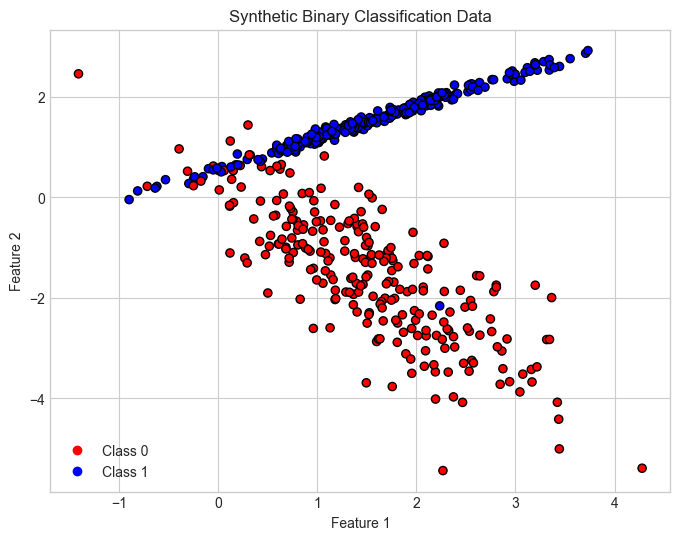

First 5 rows:
   Feature 1  Feature 2  Target
0   1.508455  -1.547010       0
1   0.826021   1.002541       1
2   1.524205  -2.297143       0
3   0.621880   0.559371       0
4   0.539100   0.882369       1


In [10]:
# Generate synthetic classification data (2 features for visualization)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42, class_sep=1.5)

# Visualize the generated data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k', s=35)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=['Class 0', 'Class 1'])
plt.show()

# Convert to DataFrame (optional)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
print("First 5 rows:")
print(df.head())

#### 3. Train/Test Split

In [11]:
# Split the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 375 samples
Test set size: 125 samples


#### 4. Feature Scaling

**Important Step:** Logistic Regression uses gradient descent (or similar optimization algorithms) to find the optimal weights. These algorithms converge much faster and perform better when features are on a similar scale. Scaling is also crucial for regularization to work correctly, as the penalty is applied to the coefficients, which are scale-dependent.

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on train data

# Display scaled data (optional)
print("\nFirst 5 rows of scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=['Feature 1', 'Feature 2']).head())


First 5 rows of scaled training data:
   Feature 1  Feature 2
0  -2.379643   0.116864
1   2.094846   1.412007
2  -0.877469   0.556592
3   2.037138   1.399311
4  -0.291942  -0.581991


#### 5. Training the Logistic Regression Model

We'll use scikit-learn's `LogisticRegression`. Key parameters:
*   `penalty`: 'l1', 'l2' (default), 'elasticnet', 'none'.
*   `C`: Inverse of regularization strength (default=1.0).
*   `solver`: Algorithm to use for optimization ('liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'). Different solvers support different penalties. 'liblinear' is good for smaller datasets and supports L1/L2. 'lbfgs' is often the default for L2 or 'none'. 'saga' supports L1, L2, and elasticnet.
*   `random_state`: For reproducibility.
*   `max_iter`: Maximum number of iterations for solvers to converge.

In [13]:
# Create and train the Logistic Regression classifier
# Using default L2 regularization (penalty='l2', C=1.0)
log_reg = LogisticRegression(random_state=42, solver='lbfgs', C=1.0, penalty='l2')

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

print(f"Logistic Regression model trained with parameters:")
print(f"  Penalty: {log_reg.penalty}")
print(f"  C: {log_reg.C}")
print(f"  Solver: {log_reg.solver}")

Logistic Regression model trained with parameters:
  Penalty: l2
  C: 1.0
  Solver: lbfgs


#### 6. Making Predictions

We can predict both the class labels and the class probabilities.

In [14]:
# Predict the Test set results (class labels)
y_pred = log_reg.predict(X_test_scaled)

# Predict probabilities
# Returns probabilities for each class [P(class=0), P(class=1)]
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Display predictions vs actual values (optional)
results_df = pd.DataFrame({
    'Actual': y_test, 
    'Predicted Label': y_pred, 
    'Predicted Prob (Class 0)': y_pred_proba[:, 0],
    'Predicted Prob (Class 1)': y_pred_proba[:, 1]
})
print("\nFirst 10 predictions:")
print(results_df.head(10).round(4))


First 10 predictions:
   Actual  Predicted Label  Predicted Prob (Class 0)  Predicted Prob (Class 1)
0       1                1                    0.0072                    0.9928
1       0                0                    0.8839                    0.1161
2       1                1                    0.0322                    0.9678
3       1                1                    0.0198                    0.9802
4       0                0                    0.9217                    0.0783
5       1                1                    0.0107                    0.9893
6       1                1                    0.1981                    0.8019
7       0                0                    0.9988                    0.0012
8       0                0                    0.9985                    0.0015
9       0                0                    0.9405                    0.0595


#### 7. Evaluating the Model

Common metrics include accuracy, confusion matrix, precision, recall, F1-score, and the ROC AUC score.


--- Model Evaluation ---
Confusion Matrix:
[[59  3]
 [ 0 63]]

Accuracy: 0.9760
ROC AUC Score: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.95      1.00      0.98        63

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



<Figure size 800x600 with 0 Axes>

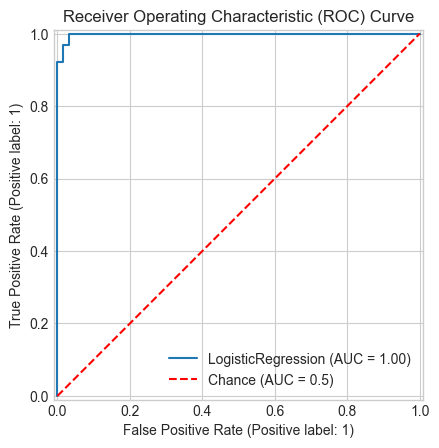

In [17]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1]) # Use probabilities for class 1 for AUC

print("\n--- Model Evaluation ---")
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {acc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (AUC = 0.5)')
plt.legend()
plt.grid(True)
plt.show()

#### 8. Interpreting Coefficients

The coefficients (weights) learned by the model indicate the relationship between each feature and the log-odds of the outcome.

*   `log_reg.coef_`: Contains the coefficients (\(\beta_1, \dots, \beta_n\)) for each feature.
*   `log_reg.intercept_`: Contains the intercept (\(\beta_0\)).

A positive coefficient means that an increase in the feature value increases the log-odds (and thus the probability) of the outcome being class 1. A negative coefficient means the opposite.

To interpret the effect on *odds* (not log-odds), we can exponentiate the coefficients: \( e^{\beta_j} \). This gives the multiplicative change in the odds for a one-unit increase in feature \(x_j\), holding other features constant.

In [18]:
print("\n--- Model Coefficients ---")
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
feature_names = ['Feature 1', 'Feature 2']

print(f"Intercept (beta_0): {intercept:.4f}")
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (beta)': coefficients})
print("Coefficients:")
print(coef_df)

# Interpret in terms of odds ratios
coef_df['Odds Ratio (exp(beta))'] = np.exp(coef_df['Coefficient (beta)'])
print("\nOdds Ratios:")
print(coef_df)

print("\nInterpretation Example (Feature 1):")
print(f"A one-unit increase in scaled Feature 1 changes the log-odds of being Class 1 by {coef_df.loc[0, 'Coefficient (beta)']:.4f}.")
print(f"This corresponds to multiplying the odds of being Class 1 by {coef_df.loc[0, 'Odds Ratio (exp(beta))']:.4f}.")


--- Model Coefficients ---
Intercept (beta_0): -0.5412
Coefficients:
     Feature  Coefficient (beta)
0  Feature 1            0.271464
1  Feature 2            4.309057

Odds Ratios:
     Feature  Coefficient (beta)  Odds Ratio (exp(beta))
0  Feature 1            0.271464                1.311884
1  Feature 2            4.309057               74.370320

Interpretation Example (Feature 1):
A one-unit increase in scaled Feature 1 changes the log-odds of being Class 1 by 0.2715.
This corresponds to multiplying the odds of being Class 1 by 1.3119.


**Important Note:** These interpretations are based on the *scaled* features. A one-unit increase in a scaled feature corresponds to an increase of one standard deviation in the original feature's scale.

#### 9. Visualizing the Decision Boundary

Since we used 2 features, we can visualize the linear decision boundary learned by the model.

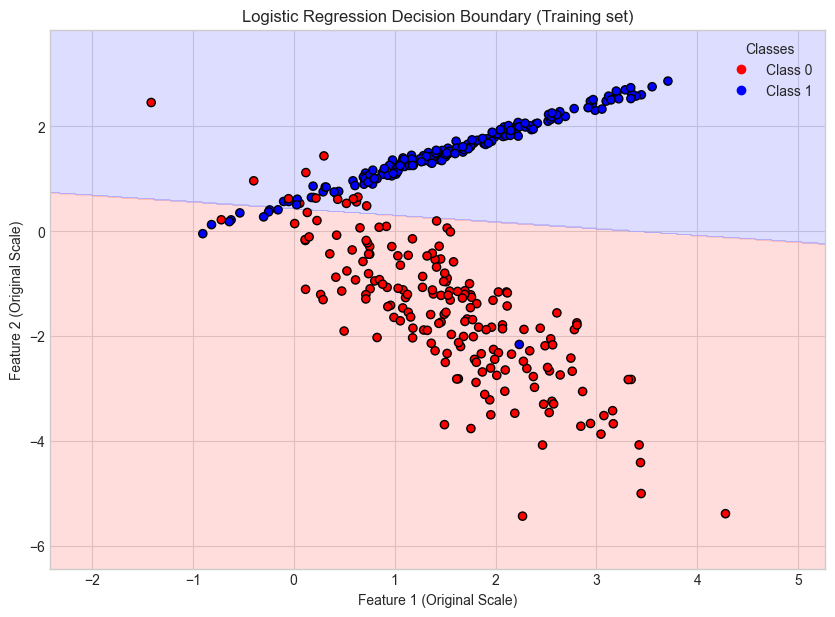

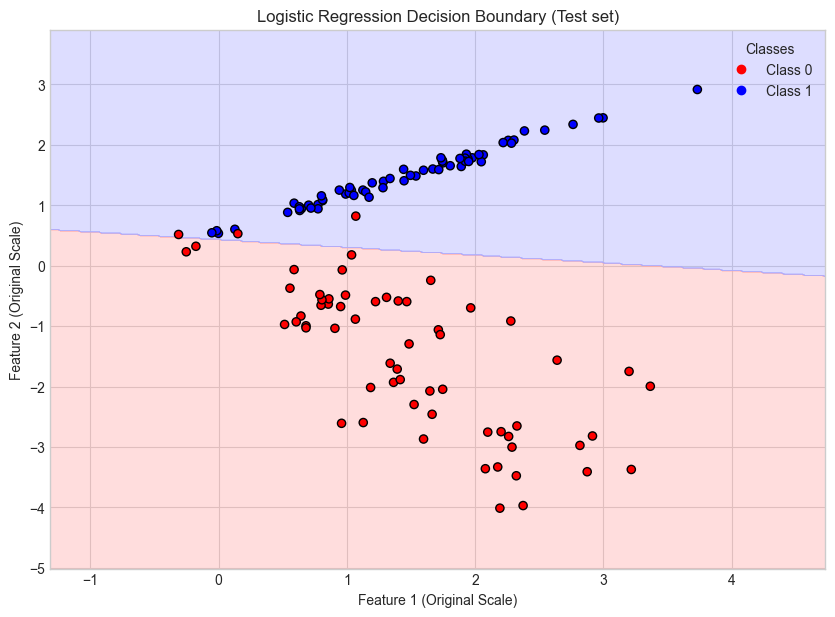

In [19]:
# Function to plot decision boundaries (adapted for Logistic Regression)
def plot_decision_boundary(X, y, model, scaler, title):
    X_set, y_set = X, y # Expecting scaled data
    
    # Create mesh grid using original data range, then scale it
    X_orig = scaler.inverse_transform(X_set)
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1, X_orig[:, 1].max() + 1
    
    xx_orig, yy_orig = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                   np.arange(y_min, y_max, 0.02))
    
    mesh_points = np.c_[xx_orig.ravel(), yy_orig.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    
    # Predict the class for each point in the scaled mesh grid
    Z = model.predict(mesh_points_scaled)
    Z = Z.reshape(xx_orig.shape)

    # Plot the contour and the data points (using original scale for axes)
    plt.figure(figsize=(10, 7))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.contourf(xx_orig, yy_orig, Z, alpha=0.4, cmap=cmap_light)
    plt.xlim(xx_orig.min(), xx_orig.max())
    plt.ylim(yy_orig.min(), yy_orig.max())

    # Plot the actual data points (using original scale)
    scatter = plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y_set, cmap=cmap_bold, edgecolors='k', s=35)
    
    # Create legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles, labels=['Class 0', 'Class 1'], title="Classes")

    plt.title(title)
    plt.xlabel('Feature 1 (Original Scale)')
    plt.ylabel('Feature 2 (Original Scale)')
    plt.grid(True)
    plt.show()

# Plot for Training Set
plot_decision_boundary(X_train_scaled, y_train, log_reg, scaler, 'Logistic Regression Decision Boundary (Training set)')

# Plot for Test Set
plot_decision_boundary(X_test_scaled, y_test, log_reg, scaler, 'Logistic Regression Decision Boundary (Test set)')

The plot shows the linear boundary separating the two classes as learned by the Logistic Regression model.

#### 10. Hyperparameter Tuning (Example with C)

We can tune the regularization strength `C` using GridSearchCV.

In [20]:
# Define the parameter grid for C
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Inverse regularization strength
    'penalty': ['l2'], # Focusing on L2
    'solver': ['lbfgs'] # Solver compatible with L2
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                           param_grid, 
                           refit=True, 
                           verbose=1, 
                           cv=5, 
                           scoring='roc_auc') # Optimize for AUC

# Fit grid search
print("\nStarting GridSearchCV for Logistic Regression...")
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("\nBest parameters found:", grid_search.best_params_)
print(f"Best cross-validation ROC AUC: {grid_search.best_score_:.4f}")

# Evaluate the best model found by grid search on the test set
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test_scaled)
y_pred_proba_best = best_log_reg.predict_proba(X_test_scaled)[:, 1]

acc_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("\n--- Evaluation of Best Model from GridSearchCV (on Test Set) ---")
print(f"Test Set Accuracy: {acc_best:.4f}")
print(f"Test Set ROC AUC: {roc_auc_best:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation ROC AUC: 0.9818

--- Evaluation of Best Model from GridSearchCV (on Test Set) ---
Test Set Accuracy: 0.9760
Test Set ROC AUC: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.95      1.00      0.98        63

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



### Conclusion

This notebook covered Logistic Regression, a fundamental algorithm for binary classification.

Key takeaways:
*   It models the probability of an outcome using the **sigmoid function** applied to a linear combination of features.
*   It produces a **linear decision boundary** (in its basic form).
*   It's **interpretable** through its coefficients (log-odds).
*   **Feature scaling** is important for optimization and regularization.
*   **Regularization** (L1/L2 via `penalty` and `C`) helps prevent overfitting.
*   It serves as a strong **baseline model** and is computationally efficient.

While simple, Logistic Regression is a powerful and widely used tool in the machine learning toolkit.